In [36]:
import pandas as pd
data = pd.read_csv('user_profiles_for_ads.csv')
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [23]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display unique values for categorical columns to understand their structure
unique_values = {col: data[col].unique() for col in data.select_dtypes(include='object').columns}

missing_values, unique_values


(User ID                            0
 Age                                0
 Gender                             0
 Location                           0
 Language                           0
 Education Level                    0
 Likes and Reactions                0
 Followed Accounts                  0
 Device Usage                       0
 Time Spent Online (hrs/weekday)    0
 Time Spent Online (hrs/weekend)    0
 Click-Through Rates (CTR)          0
 Conversion Rates                   0
 Ad Interaction Time (sec)          0
 Income Level                       0
 Top Interests                      0
 dtype: int64,
 {'Age': array(['25-34', '65+', '45-54', '35-44', '18-24', '55-64'], dtype=object),
  'Gender': array(['Female', 'Male'], dtype=object),
  'Location': array(['Suburban', 'Urban', 'Rural'], dtype=object),
  'Language': array(['Hindi', 'Spanish', 'English', 'Mandarin'], dtype=object),
  'Education Level': array(['Technical', 'PhD', 'Master', 'Bachelor', 'High School'],
       

In [24]:
data.dtypes

User ID                              int64
Age                                 object
Gender                              object
Location                            object
Language                            object
Education Level                     object
Likes and Reactions                  int64
Followed Accounts                    int64
Device Usage                        object
Time Spent Online (hrs/weekday)    float64
Time Spent Online (hrs/weekend)    float64
Click-Through Rates (CTR)          float64
Conversion Rates                   float64
Ad Interaction Time (sec)            int64
Income Level                        object
Top Interests                       object
dtype: object

In [25]:
categorical_cols = [
    'Age', 'Gender', 'Location', 'Language',
    'Education Level', 'Device Usage', 'Income Level', 'Top Interests'
]
data[categorical_cols] = data[categorical_cols].astype('category')

In [26]:
data.dtypes

User ID                               int64
Age                                category
Gender                             category
Location                           category
Language                           category
Education Level                    category
Likes and Reactions                   int64
Followed Accounts                     int64
Device Usage                       category
Time Spent Online (hrs/weekday)     float64
Time Spent Online (hrs/weekend)     float64
Click-Through Rates (CTR)           float64
Conversion Rates                    float64
Ad Interaction Time (sec)             int64
Income Level                       category
Top Interests                      category
dtype: object

In [27]:
age_mapping = {
    '18-24': 'Young Adults',
    '25-34': 'Young Adults',
    '35-44': 'Middle-Aged',
    '45-54': 'Middle-Aged',
    '55-64': 'Seniors',
    '65+': 'Seniors'
}
data['Age Group'] = data['Age'].map(age_mapping).astype('category')

In [28]:
income_mapping = {
    '0-20k': 'Low Income',
    '20k-40k': 'Low Income',
    '40k-60k': 'Middle Income',
    '60k-80k': 'Middle Income',
    '80k-100k': 'High Income',
    '100k+': 'High Income'
}
data['Income Bracket'] = data['Income Level'].map(income_mapping).astype('category')


In [29]:
device_mapping = {
    'Mobile Only': 'Mobile',
    'Desktop Only': 'Desktop',
    'Mobile + Desktop': 'Multi-Device',
    'Tablet': 'Tablet'
}
data['Device Type'] = data['Device Usage'].map(device_mapping).astype('category')


In [44]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Weekly Time Spent Online
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,25.9
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,17.9
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,33.7
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",23.9
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",17.6


In [31]:
data.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


- High variability in user engagement: Metrics such as Likes and Reactions, Followed Accounts, and Ad Interaction Time have a wide range, indicating diverse user behaviors.
- Weekend vs. Weekday behavior: Users spend significantly more time online during weekends, which may be an opportunity for targeted campaigns.
- Engagement with ads:
    Conversion rates are relatively low (mean: 4.98%), highlighting a potential area for optimization.
    The high variability in ad interaction time suggests that a subset of users is highly receptive to ads.
- CTR and Conversions: The gap between CTR and conversion rates may point to issues in funnel optimization or mismatched targeting.
- Actionable Segmentation: Users can be segmented by time spent online, engagement levels, or ad interaction behavior for personalized strategies.

In [32]:
print(data['Age'].value_counts())
print(data['Income Level'].value_counts())

25-34    255
35-44    192
45-54    188
18-24    166
55-64    153
65+       46
Name: Age, dtype: int64
100k+       176
40k-60k     175
60k-80k     168
80k-100k    168
20k-40k     165
0-20k       148
Name: Income Level, dtype: int64


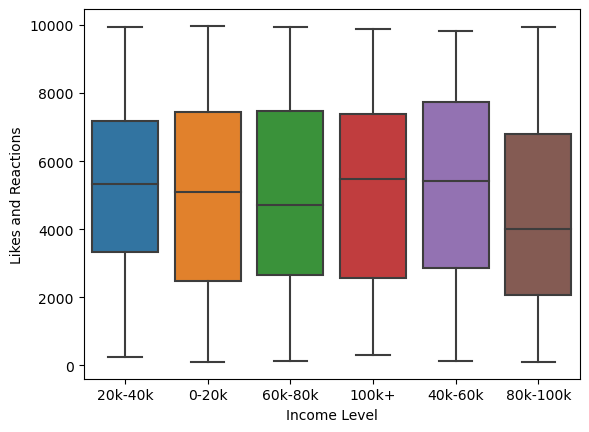

In [37]:
sns.boxplot(x='Income Level', y='Likes and Reactions', data=data)
plt.show()

- Across all income levels, the distribution of Likes and Reactions appears relatively consistent, with no significant outliers or anomalies in any group.
- The IQR (box height) is fairly consistent, indicating that the middle 50% of likes and reactions (from the 25th to 75th percentile) does not vary significantly by income level.
- Higher income groups (e.g., 60k+) appear to show slightly higher median likes and reactions compared to lower income groups (e.g., 0-20k). This could reflect differing levels of activity, access to platforms, or content preferences

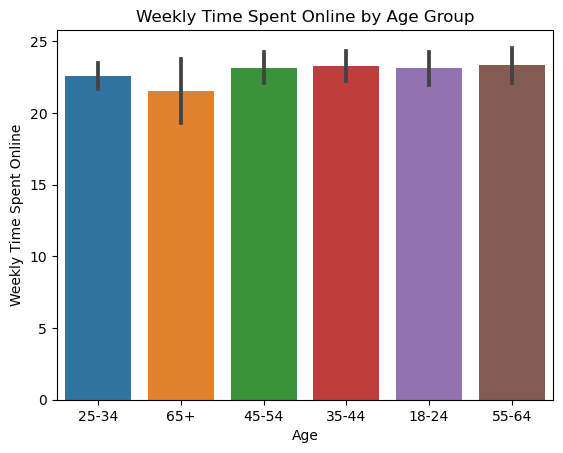

In [42]:
data['Weekly Time Spent Online'] = (
    data['Time Spent Online (hrs/weekday)'] * 5 +
    data['Time Spent Online (hrs/weekend)'] * 2
)
sns.barplot(x='Age', y='Weekly Time Spent Online', data=data)
plt.title('Weekly Time Spent Online by Age Group')
plt.show()

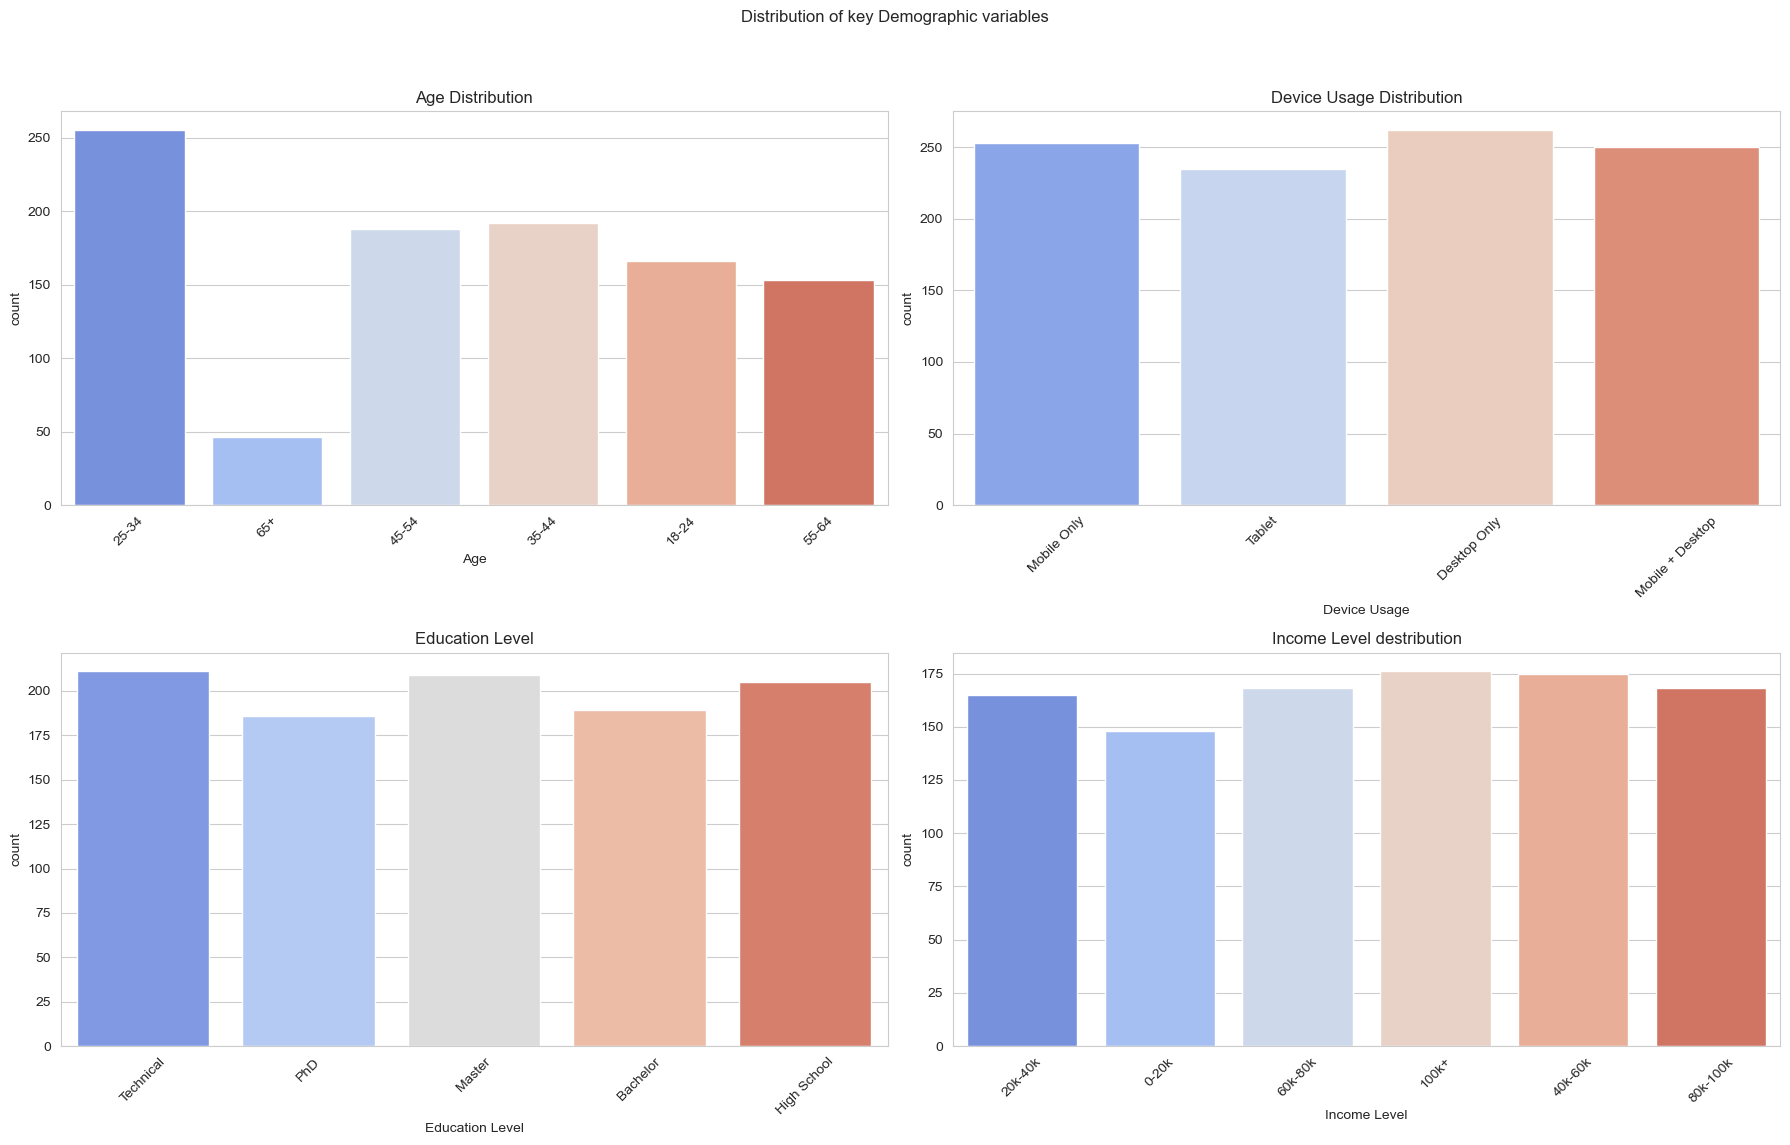

In [46]:
# setting the style for plots
sns.set_style('whitegrid')

# creating subplots for the demographic distributions
fig, ax = plt.subplots(2, 2, figsize=(18,12))
fig.suptitle("Distribution of key Demographic variables")

# age distribution
sns.countplot(ax=ax[0,0], x='Age', data=data, palette='coolwarm')
ax[0,0].set_title('Age Distribution')
ax[0,0].tick_params(axis='x', rotation = 45)

# Device Usage distribution
sns.countplot(ax=ax[0,1], x='Device Usage', data=data, palette='coolwarm')
ax[0,1].set_title('Device Usage Distribution')
ax[0,1].tick_params(axis='x', rotation = 45)

# education level distribution
sns.countplot(ax=ax[1,0], x='Education Level', data=data, palette='coolwarm')
ax[1,0].set_title('Education Level')
ax[1,0].tick_params(axis='x', rotation = 45)

# income level distribution
sns.countplot(ax=ax[1,1], x='Income Level', data=data, palette='coolwarm')
ax[1,1].set_title('Income Level destribution')
ax[1,1].tick_params(axis='x', rotation = 45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

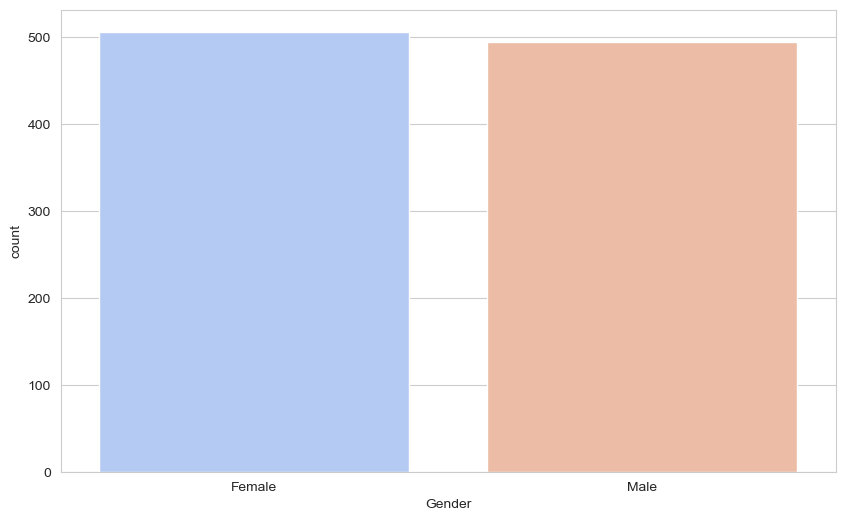

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=data, palette='coolwarm')
plt.show()

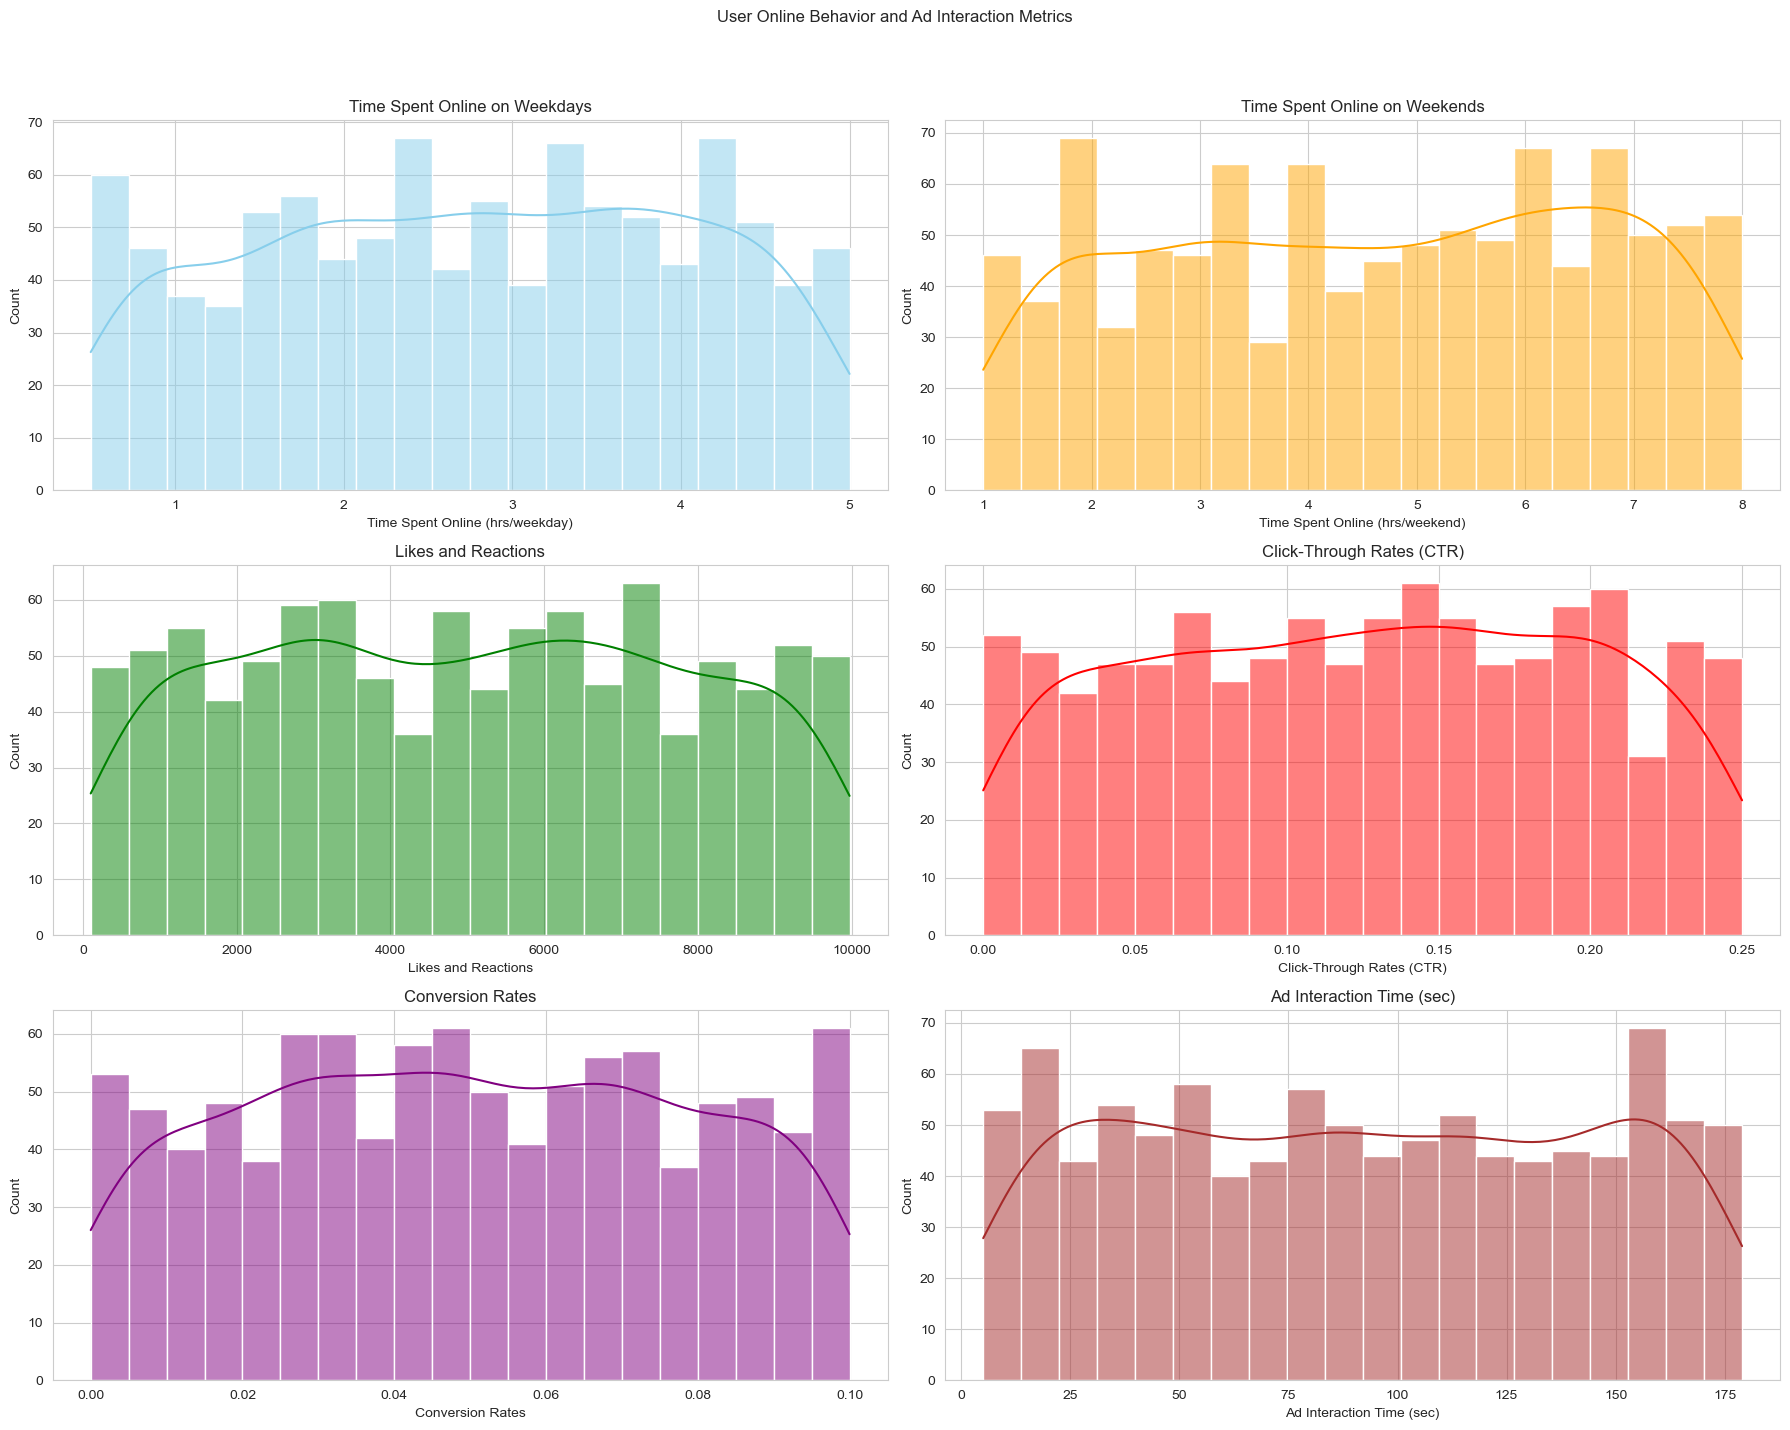

In [49]:
# creating subplots for user online behavior and ad interaction metrics
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=ax[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
ax[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=ax[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
ax[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=ax[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
ax[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=ax[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
ax[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=ax[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
ax[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=ax[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
ax[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

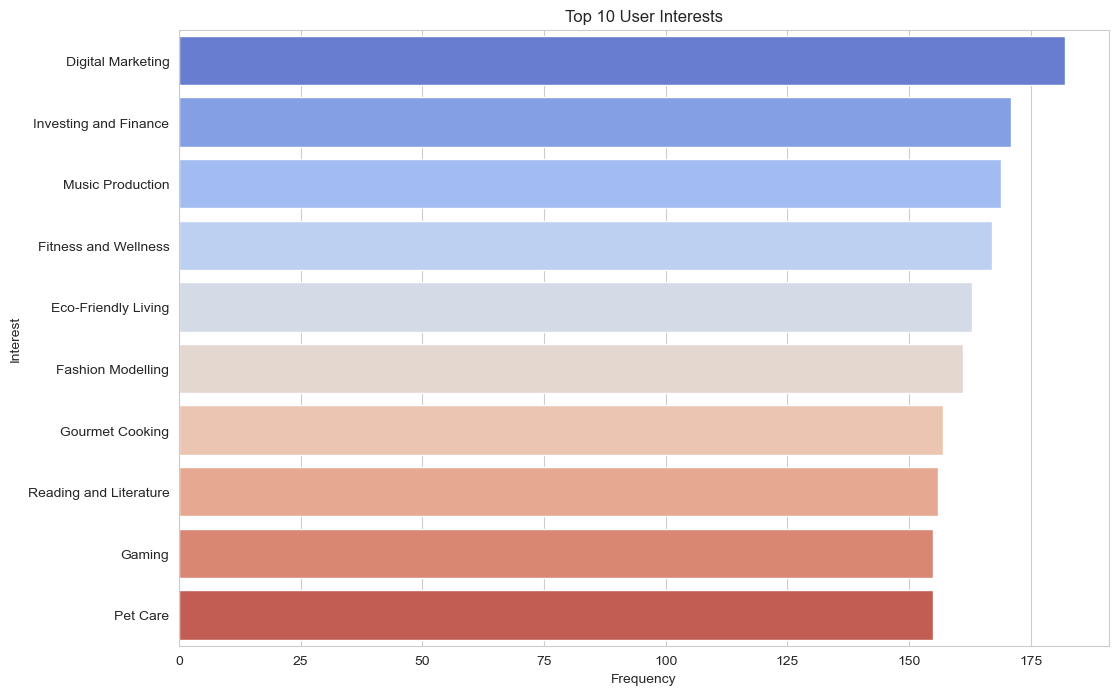

In [52]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

# User Profiling and Segmentation
We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:

- Demographics: Age, Gender, Income Level, Education Level
- Behavioural: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
- Interests: Aligning ad content with the top interests identified

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

data.head()

C:\Users\Suchita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Suchita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Weekly Time Spent Online,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,25.9,1
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,17.9,0
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,33.7,3
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",23.9,1
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",17.6,1


In [57]:
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means


,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,1.632955,6.135795,5480.022727,0.173705,25-34,Male,80k-100k
1,2.937500,2.735000,7462.233333,0.152983,25-34,Male,100k+
2,3.364532,6.151724,5997.108374,0.058502,25-34,Male,60k-80k
3,3.872986,4.624171,2409.625592,0.167123,25-34,Female,60k-80k
4,1.558235,3.769412,3034.235294,0.064153,25-34,Female,0-20k


# we can summarize and name the segments as follows:

- Cluster 0 – This group spends significant time on weekends, showing strong engagement with content (likes/reactions) and ads (CTR). Targeting this group with weekend-focused campaigns could be effective.
- Cluster 1 – This group spends less time on weekends compared to Cluster 0 but has a higher level of engagement during weekdays. They are likely to be receptive to high-value offers or ads during weekdays. Higher income levels suggest that they may be more responsive to premium or luxury products.
- Cluster 2 – This group spends a considerable amount of time on weekends, with slightly lower engagement during weekdays. The relatively low CTR suggests that their ad interactions are less frequent or effective. This group might need more targeted content or better-suited ads to increase engagement.
- Cluster 3 – Despite spending more time on weekdays, this group shows lower overall engagement but high ad interaction (CTR). More targeted or interactive ad formats may improve engagement, especially during the weekdays when they are more active.
- Cluster 4 – This group has lower overall engagement and time spent online, especially on weekdays. However, they still show moderate CTR, indicating that they interact with ads more than some others. This group may need content tailored to their financial constraints and more targeted ad campaigns that appeal to their preferences.